<a href="https://colab.research.google.com/github/mthbrito/Extracao-limpeza-de-dados-e-producao-de-mapa-coropletico/blob/main/Processamento_de_imagens_Detec%C3%A7%C3%A3o_de_bordas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importação de bibliotecas**

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

**Upload das imagens**

In [ ]:
imagem = Image.open('/content/imagem.jpg')
imagem2 = Image.open('/content/imagem2.jpg')

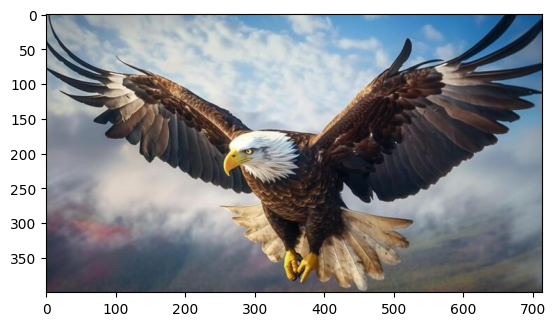

In [ ]:
plt.imshow(imagem)

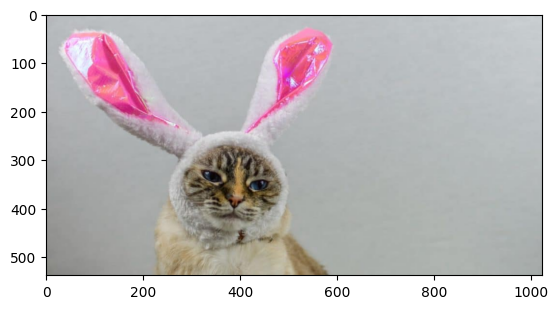

In [ ]:
plt.imshow(imagem2)

**Representação da imagem como matriz**

- Uma imagem nada mais é que uma MATRIZ;
- Cada elemento dessa matriz é um PIXEL;
- Pixels possuem valores que determinam sua COR e INTENSIDADE.

array([[[130, 137, 147],
        [127, 134, 144],
        [130, 139, 148],
        ...,
        [ 19,  87, 148],
        [ 17,  85, 148],
        [ 17,  87, 149]],

       [[130, 137, 147],
        [128, 135, 145],
        [130, 139, 148],
        ...,
        [ 21,  87, 148],
        [ 18,  86, 147],
        [ 19,  87, 148]],

       [[129, 136, 146],
        [130, 137, 147],
        [130, 139, 148],
        ...,
        [ 21,  87, 147],
        [ 20,  86, 146],
        [ 20,  86, 146]],

       ...,

       [[ 71,  51,  63],
        [ 72,  52,  64],
        [ 72,  52,  64],
        ...,
        [ 67,  68,  70],
        [ 66,  67,  69],
        [ 66,  67,  69]],

       [[ 71,  51,  63],
        [ 71,  51,  63],
        [ 72,  52,  64],
        ...,
        [ 64,  66,  65],
        [ 63,  64,  66],
        [ 63,  64,  66]],

       [[ 70,  50,  62],
        [ 71,  51,  63],
        [ 71,  51,  63],
        ...,
        [ 62,  64,  63],
        [ 62,  63,  65],
        [ 62,  63,  65]]], dtype=uint8)
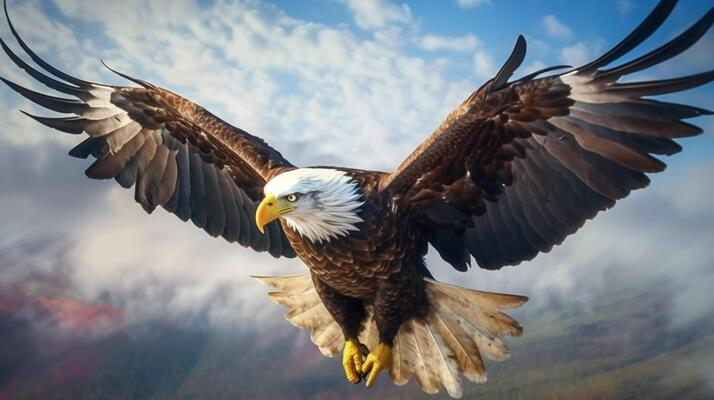

In [ ]:
np.array(imagem)

**Detecção de bordas de uma imagem**

- A detecção de bordas de uma imagem ocorre por meio da identificação de áreas de transição bruscas na intensidade dos pixels;

- Nesta aplicação foi utilizado o filtro de Sobel para detecção de bordas;

 - O filtro de Sobel utiliza duas máscaras (matrizes 3x3) para calcular gradientes nas direções horizontal e vertical, a combinação dos gradientes resultantes revela a magnitude e direção das bordas, destacando contornos na imagem.

**Aplicação do filtro de Sobel**

- O primeiro passo é a transformação da imagem RGB em escala de cinza;
- A utilização da escala de cinza facilita na detecção de bordas, pois reduz a quantidade de dados a apenas um canal de cor.

In [ ]:
def geraImagemCinza(imagem):
  """Gera imagem em escala de cinza"""
  matriz = np.array(imagem)
  imagemCinza = []
  for i in range(len(matriz)):
    linhaCinza = []
    for j in range(len(matriz[i])):
      pixelCinza = matriz[i][j][0] * 0.2990 + matriz[i][j][1] * 0.5870 + matriz[i][j][2] * 0.1140
      linhaCinza.append(int(pixelCinza))
    imagemCinza.append(linhaCinza)
  return imagemCinza

In [ ]:
print(geraImagemCinza(imagem))

[[136, 133, 137, 111, 50, 71, 142, 139, 137, 137, 137, 138, 134, 129, 125, 122, 123, 123, 122, 123, 124, 125, 127, 127, 129, 131, 134, 134, 134, 135, 140, 143, 142, 140, 141, 141, 140, 136, 130, 125, 123, 122, 119, 116, 115, 115, 114, 116, 118, 121, 123, 127, 132, 141, 150, 158, 156, 159, 162, 164, 163, 164, 166, 168, 167, 168, 168, 167, 165, 164, 162, 162, 161, 161, 160, 159, 159, 159, 158, 157, 156, 156, 157, 158, 159, 160, 161, 162, 162, 162, 163, 164, 164, 164, 164, 164, 165, 164, 164, 165, 165, 165, 166, 166, 163, 162, 162, 161, 161, 161, 162, 162, 165, 166, 167, 168, 169, 169, 169, 169, 169, 169, 169, 170, 170, 170, 171, 171, 174, 175, 176, 176, 175, 174, 173, 172, 172, 171, 170, 169, 168, 167, 167, 167, 165, 165, 165, 166, 166, 169, 173, 174, 176, 176, 176, 177, 177, 177, 177, 178, 176, 177, 176, 174, 173, 172, 171, 170, 170, 171, 173, 175, 176, 177, 178, 177, 181, 181, 180, 179, 179, 179, 177, 177, 177, 175, 173, 172, 170, 168, 165, 163, 161, 157, 152, 148, 145, 143, 137, 135, 

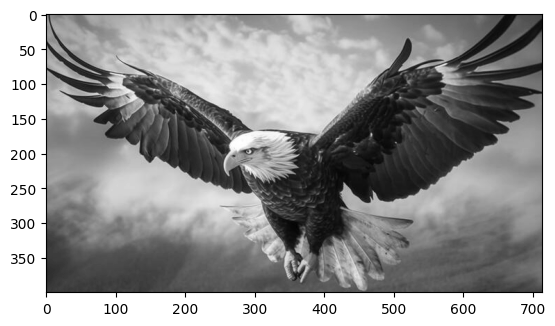

In [ ]:
plt.imshow(geraImagemCinza(imagem), cmap = 'gray')

- Após a transformação da imagem em escala de cinza, o próximo passo é gerar a imagem inicial que receberá o resultado da aplicação do filtro de Sobel;
- Essa imagem gerada não inclui as bordas da imagem, pois os pixels que se encontram nas bordas não possuem vizinhos, algo necesário ao cálculo dos gradientes.

In [ ]:
def geraImagemInicial(altura, largura):
  """Gera imagem inicial de tamanho igual a original excluindo as bordas"""
  matriz = []
  for i in range(altura - 2):
    linha = []
    for j in range(largura - 2):
      linha.append(0)
    matriz.append(linha)
  return matriz

In [ ]:
print(geraImagemInicial(len(geraImagemCinza(imagem)), len(geraImagemCinza(imagem)[0])))

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

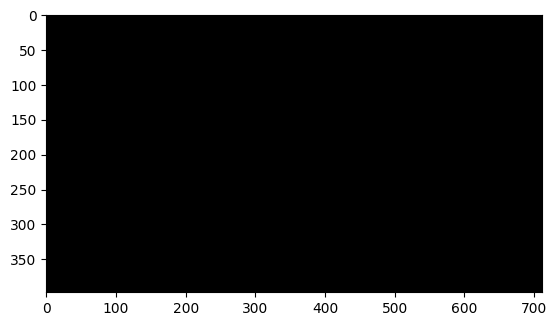

In [ ]:
plt.imshow(geraImagemInicial(len(geraImagemCinza(imagem)), len(geraImagemCinza(imagem)[0])), cmap = 'gray')

- O filtro de Sobel utiliza duas máscaras

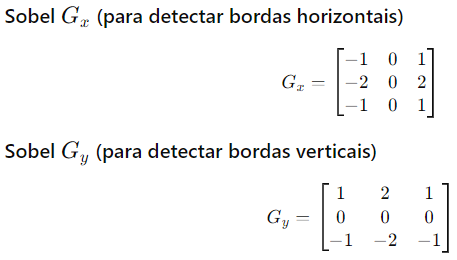

- As máscaras são aplicadas separadamente para cada pixel;
- Cada pixel e seus vizinhos formam uma matriz 3x3;
- Essa matriz formada é multiplicada elemento a elemento por uma das máscaras;
- Os valores gerados desta multiplicação são somados, gerando o gradiente do pixel em destaque.

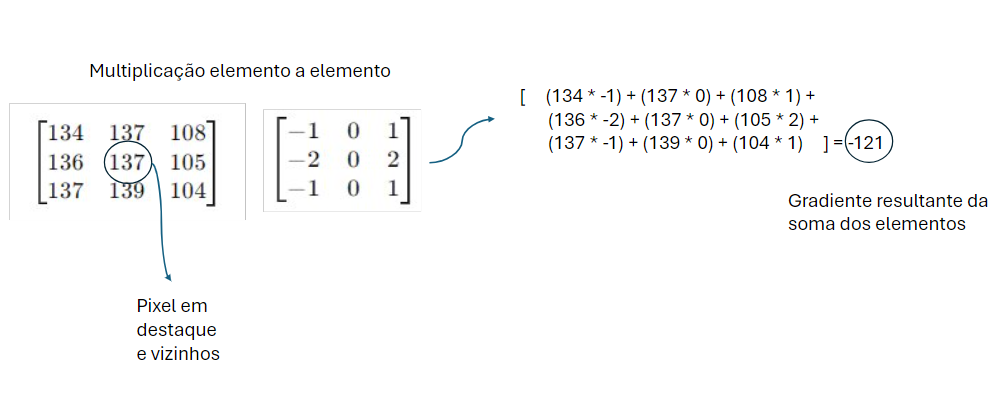

- Assim que os gradientes horizontal e vertical do pixel em destaque são calculados, calcula-se a magnitude do gradiente do pixel;
- Os resultados da magnitude devem ser inteiros e estarem entre 0 e 255.

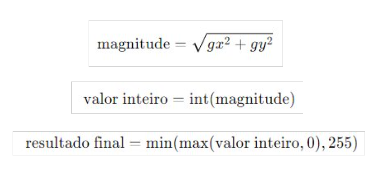

In [ ]:
def calculaMagnitude(gx, gy):
  """Cálculo da magnitude dos gradientes"""
  return min(max(int((gx ** 2 + gy ** 2) ** 0.5), 0), 255)

def deteccaoDeBordas(imagem):
  """Função que realiza a detecção de bordas em uma imagem"""

  imagem = geraImagemCinza(imagem)
  altura = len(imagem)
  largura = len(imagem[0])
  filtro = geraImagemInicial(altura, largura)
  gx = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
  gy = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]

  """Acesso aos pixels, exceto bordas"""
  for i in range(1, altura - 1):
    for j in range(1, largura - 1):

      #1 - Inicialização dos gradientes x e y
      gxRes, gyRes = 0, 0

      """Acesso ao pixel em destaque e pixels vizinhos"""
      for k in range(-1, 2):
        for l in range(-1, 2):

          pixel = imagem[i + k][j + l]
          #2 - Somatório da multiplicação elemento a elemento
          gxRes += pixel * gx[k + 1][l + 1]
          gyRes += pixel * gy[k + 1][l + 1]

      #3 - Cálculo da magnitude dos gradientes
      magnitude = calculaMagnitude(gxRes, gyRes)

      #4 - Atribuição dos valores de magnitude resultante aos pixels da imagem resultado
      filtro[i - 1][j - 1] = magnitude
  return filtro

**Aplicação do filtro de Sobel às imagens**

In [ ]:
imagemSoBordas = deteccaoDeBordas(imagem)
imagem2SoBordas = deteccaoDeBordas(imagem2)

In [ ]:
plt.imshow(imagemSoBordas, cmap='gray')

In [ ]:
plt.imshow(imagem2SoBordas, cmap='gray')